<a href="https://colab.research.google.com/github/bharaniakella/Akellian_DL/blob/main/Using_batch_loader_iris_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader, TensorDataset

In [25]:
# import dataset
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [26]:
train_data,test_data,train_labels,test_labels=train_test_split(data,labels,train_size=0.8)

train_data=TensorDataset(train_data,train_labels)
test_data=TensorDataset(test_data,test_labels)

train_loader=DataLoader(train_data,shuffle=True,batch_size=12)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [29]:
def create_model():
  ann_iris=nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3)
  )
  loss_fun=nn.CrossEntropyLoss()
  optimizer=torch.optim.SGD(ann_iris.parameters(),lr=0.05)
  return ann_iris,loss_fun, optimizer

In [33]:
num_epochs=1000
train_acc=[]
test_acc=[]
def train_model(ann_iris):
  for epochi in range(num_epochs):
    batch_acc=[]
    for x,y in train_loader:
      yhat=ann_iris(x)
      loss=loss_fun(yhat,y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batch_acc.append(100*torch.mean((torch.argmax(yhat,axis=1)==y).float()).item())

    train_acc.append(np.mean(batch_acc))

    x,y=next(iter(test_loader))
    yhat=ann_iris(x)
    test_acc.append(100*torch.mean((torch.argmax(yhat,axis=1)==y).float()).item())

  return train_acc, test_acc

In [34]:
ann_iris,loss_fun, optimizer=create_model()
train_acc,test_acc=train_model(ann_iris)

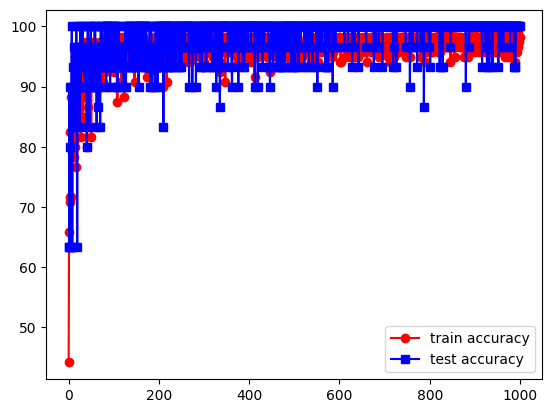

In [39]:
plt.plot(train_acc,'ro-')
plt.plot(test_acc,'bs-')
plt.legend(['train accuracy','test accuracy'])
plt.show()